In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<AxesSubplot:xlabel='count', ylabel='domain'>

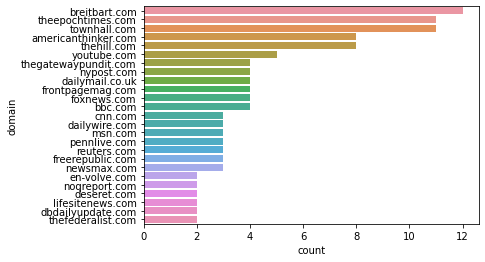

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<AxesSubplot:xlabel='count', ylabel='posted_by'>

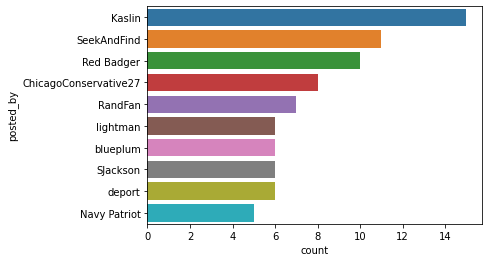

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

domain         \
                                            count unique   
domain               posted_by                             
americanthinker.com  Kaslin                     3      1   
                     SeekAndFind                2      1   
bbc.com              RandFan                    1      1   
breitbart.com        ChicagoConservative27      5      1   
                     Red Badger                 2      1   
cnn.com              blueplum                   1      1   
foxnews.com          Navy Patriot               1      1   
frontpagemag.com     SJackson                   4      1   
msn.com              blueplum                   1      1   
newsmax.com          Navy Patriot               2      1   
noqreport.com        SeekAndFind                2      1   
pennlive.com         lightman                   3      1   
theepochtimes.com    lightman                   3      1   
thefederalist.com    Kaslin                     2      1   
thegatewaypundit.com Red Badger                 1      1   
thehill.com          RandFan                    3      1   
                     ChicagoConservative27      1      1   
                     blueplum                   2      1   
                     SJackson                   1      1   
townhall.com         Kaslin                     8      1   
                     SeekAndFind                1      1   

                                                                       
                                                             top freq  
domain               posted_by                                         
americanthinker.com  Kaslin                  americanthinker.com    3  
                     SeekAndFind             americanthinker.com    2  
bbc.com              RandFan                             bbc.com    1  
breitbart.com        ChicagoConservative27         breitbart.com    5  
                     Red Badger                    breitbart.com    2  
cnn.com              blueplum                            cnn.com    1  
foxnews.com          Navy Patriot                    foxnews.com    1  
frontpagemag.com     SJackson                   frontpagemag.com    4  
msn.com              blueplum                            msn.com    1  
newsmax.com          Navy Patriot                    newsmax.com    2  
noqreport.com        SeekAndFind                   noqreport.com    2  
pennlive.com         lightman                       pennlive.com    3  
theepochtimes.com    lightman                  theepochtimes.com    3  
thefederalist.com    Kaslin                    thefederalist.com    2  
thegatewaypundit.com Red Badger             thegatewaypundit.com    1  
thehill.com          RandFan                         thehill.com    3  
                     ChicagoConservative27           thehill.com    1  
                     blueplum                        thehill.com    2  
                     SJackson                        thehill.com    1  
townhall.com         Kaslin                         townhall.com    8  
                     SeekAndFind                    townhall.com    1

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

,timestamp,replies
title,,
